In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [4]:
dataset= pd.read_csv('auto-mpg.csv')
dataset.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
dataset.describe(include='O')

,horsepower,car name
count,398,398
unique,94,305
top,150,ford pinto
freq,22,6


In [7]:
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='coerce').fillna(0).astype(int)
dataset.describe(include='O')

,car name
count,398
unique,305
top,ford pinto
freq,6


In [9]:
len(dataset)

398

In [10]:
dataset= dataset.dropna()
len(dataset)

398

In [11]:
y= dataset.iloc[:,0].values
X_en= dataset.iloc[:, 8].values

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en= dataset.iloc[:, 8].values
X_en = labelencoder.fit_transform(X_en)
X= dataset.iloc[:,1:7]

X['Car'] = X_en
full_data= X.copy()
full_data['mpg']= y
full_data.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model year,Car,mpg
0,8,307.0,130,3504,12.0,70,49,18.0
1,8,350.0,165,3693,11.5,70,36,15.0


In [13]:
full_data.corr()

,cylinders,displacement,horsepower,weight,acceleration,model year,Car,mpg
cylinders,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.275754,-0.775396
displacement,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.292064,-0.804203
horsepower,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.227172,-0.754276
weight,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.255247,-0.831741
acceleration,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.128285,0.420289
model year,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.074761,0.579267
Car,-0.275754,-0.292064,-0.227172,-0.255247,0.128285,0.074761,1.000000,0.273936
mpg,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267,0.273936,1.000000


In [14]:
importances = full_data.drop("mpg", axis=1).apply(lambda x: x.corr(full_data.mpg))
indices = np.argsort(importances)
print(importances[indices])

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
horsepower     -0.754276
Car             0.273936
acceleration    0.420289
model year      0.579267
dtype: float64


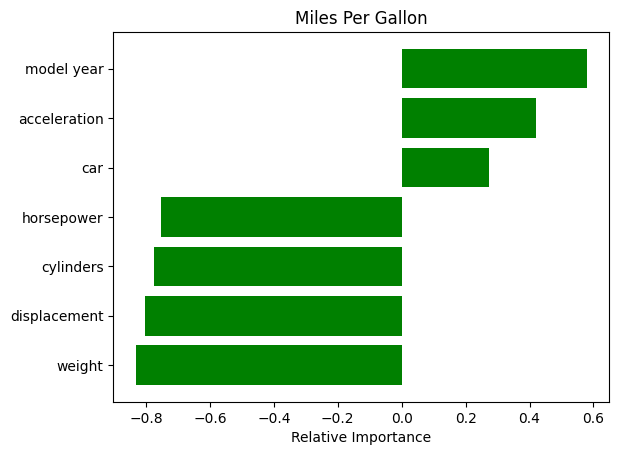

In [15]:
names=['cylinders','displacement','horsepower','weight','acceleration','model year', 'car']

plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.4:
        print(names[i])

    

cylinders
displacement
horsepower
weight
acceleration
model year


In [17]:
X= dataset[ ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
len(X.columns)

6

In [18]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

cylinders  is highly  correlated  with  displacement
cylinders  is highly  correlated  with  horsepower
cylinders  is highly  correlated  with  weight
displacement  is highly  correlated  with  cylinders
displacement  is highly  correlated  with  horsepower
displacement  is highly  correlated  with  weight
horsepower  is highly  correlated  with  cylinders
horsepower  is highly  correlated  with  displacement
horsepower  is highly  correlated  with  weight
weight  is highly  correlated  with  cylinders
weight  is highly  correlated  with  displacement
weight  is highly  correlated  with  horsepower
acceleration  is not correlated  with  model year
model year  is not correlated  with  acceleration


In [19]:
X['cylinders'].corr(X['displacement'])

0.9507213901392413

In [20]:
X= dataset[ ['cylinders',  'acceleration', 'model year']]

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   acceleration  398 non-null    float64
 2   model year    398 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [22]:
mi = mutual_info_regression(X, y)

In [23]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)

cylinders       0.646875
model year      0.362114
acceleration    0.205543
dtype: float64

<AxesSubplot:>

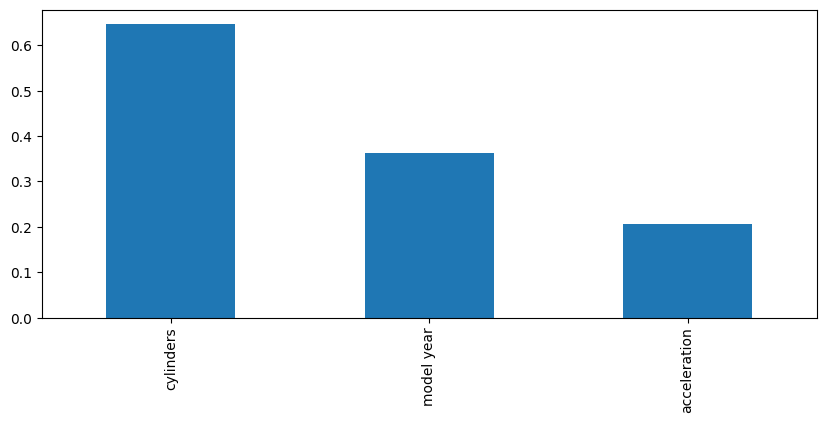

In [24]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))